# Crash course
This is a quick (very quick) intro to Python and how you can use it to begin analyzing data. 

## Introduction
Introduce the basics of the Python programming language and provide some examples for uses in data analysis. We'll be looking at the basics of the language itself, how to load data files, how to plot data, etc. While we won't cover everything here, I've tried to include some examples of the code that you can modify for your own needs. 

This notebook is partly comprised of material from the Python for Geosciences course taught at TAMU Oceanography. Code for the full course can be found here: https://github.com/snifflesnrumjum/python4geosciences

![Python Logo](https://www.python.org/static/img/python-logo.png)

### What is Python?
Simply put Python is a programming language. It's a useful scripting language. But as the [Python website](https://www.python.org/) itself says:<br>
<br>
><i>Python is a programming language that lets you work quickly
      and integrate systems more effectively. </i>  <br>
      
      
It can do almost anything you need! 

## Goals for today:
1. Create a plot of CTD data

#### How will we do this? 
1. Define and use variables
2. Create and use a function
3. Load a CSV file
4. ???
<br><br>
Let's get started!

# End product

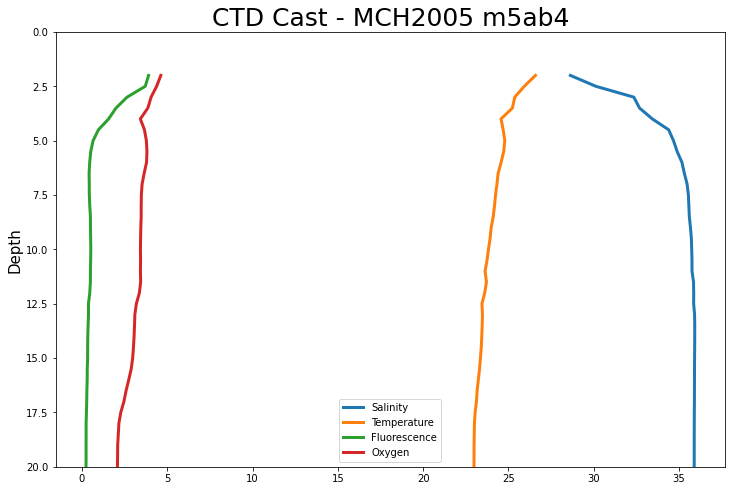


##### Looks a little blah. Let's dress it up a tiny bit

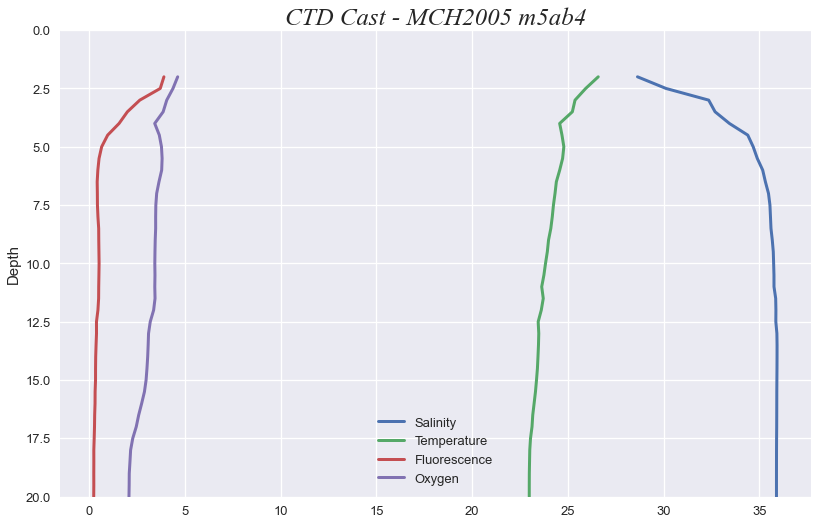

#### Task 1 - Load a data file
What do we need to do this?
- A data file
    - Path to the data file (what's a path?)
    - variables
    
    

#### Task 2 - Manipulate the data
What do we need to do this?
1. A loaded in data file
    - Reuse our prior data object
2. A function
    - Use a built-in function
    - Create our own

#### Task 3 - Plot the data
What do we need to do this?
- Our ready to plot data
    - Reuse our prior data object
- Plotting library
    - [Matplotlib](https://matplotlib.org/)

---

## Task 1 - Load a data file
What do we need to do this?
- A data file
    - Path to the data file (what's a path?)
    - variables
    
    

A path points to the location of a file or set of files. It's a way for a computer to know where to look for a specific file. We'll be using a path name that is a URL for a file located online. But a path can also point to a file that's located on your computer. 

Since we're using Google Colab online, we can't use a 'local' path (i.e. a file on our own computer) without jumping through a few hoops. We'll just go ahead and use the path that points to a file on Github.


In [1]:
path_to_file = '/my/path/to/the/file.jpg'  #generic way to create a variable containing a path string

In [ ]:
path_to_data_file = 'https://'

Now let's load our data file. For this we'll take advantage of a very useful package called pandas. The pandas package is very useful for tabular data. Note: this includes CSV files. While it was originally designed with time series data in mind, it's grown over time and can now take in spatial data. The data don't even need to be numeric!

In [2]:
import pandas as pd

#### What on earth?
Since we're using a package that isn't a 'built-in' for Python, we need to tell our Python interpreter to load that package of code so that we can use it. We only need to do this once in this 'session' and it will keep the code loaded. If we close our session, we will need to re-import the package. 

What is that 'as pd' part? 
One nifty thing about import other packages is that we can rename them as we import them. In this case, we're renaming the pandas package to be shorter: pd 

This will save us some typing later on and can help to keep the code looking a little cleaner. In this case, pd is the 'standard' way to rename the pandas package. Other common ones are:<br>
><code>import numpy as np</code>

><code>import scipy as sp</code>

><code>import matplotlib.pyplot as plt</code>

That last one is an example where it saves us quite a bit of typing

In [9]:
inpath = 'https://raw.githubusercontent.com/snifflesnrumjum/REU_Workshop/main/'
infilename = 'CTD.txt'

inpath + infilename

'https://raw.githubusercontent.com/snifflesnrumjum/REU_Workshop/main/CTD.txt'

In [11]:
data = pd.read_csv(inpath+infilename, skiprows=54, delim_whitespace=True, header=None)

In [12]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2.013,2.0,26.5827,26.5823,4.575059,28.6303,18.0579,4.62032,3.1596,56.9022,2.8503,0.62493,0.3862,3.9016,2.6426,2.5965,1.7310
1,2.515,2.5,25.9263,25.9258,4.727182,30.1208,19.3798,4.37469,3.0143,60.8058,3.0417,0.55938,0.3390,3.7094,2.6212,2.6264,1.7510
2,3.020,3.0,25.3695,25.3688,4.983968,32.3500,21.2286,4.04875,2.8266,74.4409,3.7104,0.49003,0.2819,2.6419,2.4727,2.3413,1.5609
3,3.524,3.5,25.2304,25.2296,5.016042,32.6833,21.5222,3.86168,2.7138,77.8474,3.8774,0.44482,0.2396,1.9937,2.3524,1.8684,1.2456
4,4.026,4.0,24.5680,24.5671,5.051934,33.4325,22.2871,3.42057,2.4863,80.6842,4.0166,0.41130,0.2056,1.5597,2.2455,1.7666,1.1777


Those column numbers are hideous! Let's rename our columns. I'll copy the line from the TXT document and add some commas and quote marks because these need to be strings. 

We're going to store our new column names in something called a container. In this case, the container is a list.

We define lists by using square brackets around the elements. 

In [13]:
new_column_names = ['Press', 'Depth', 'Temp', 'PoTemp', 'Cond', 'Sal', 'Sig-Th',
                    'O2', 'O2V', '%Tran', 'Tran-V', 'PAR', 'PAR-V', 'FL', 'FL-V', 'OBS', 'OBS-V']

In [14]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [15]:
data.columns = new_column_names

In [16]:
data.columns

Index(['Press', 'Depth', 'Temp', 'PoTemp', 'Cond', 'Sal', 'Sig-Th', 'O2',
       'O2V', '%Tran', 'Tran-V', 'PAR', 'PAR-V', 'FL', 'FL-V', 'OBS', 'OBS-V'],
      dtype='object')

Now it'll be a lot more intuitive for us when we want to use a specific column (e.g. 'Sal' instead of 5).

<AxesSubplot:>

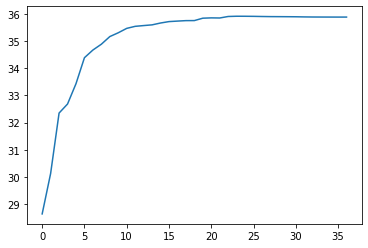

In [18]:
data.Sal.plot()

<AxesSubplot:>

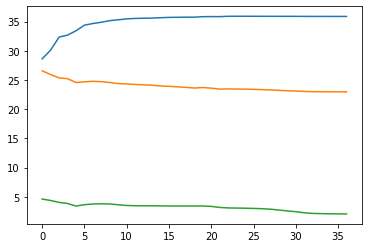

In [20]:
data.Sal.plot()
data.Temp.plot()
data.O2.plot()


In [21]:
import matplotlib.pyplot as plt

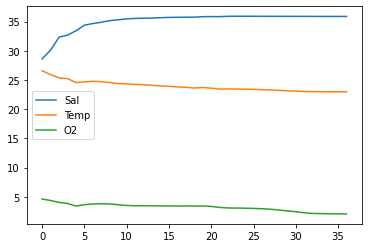

In [22]:
data.Sal.plot()
data.Temp.plot()
data.O2.plot()
plt.legend()

### Let's make a function
What if we find out that our temperature values are skewed and need to be corrected? We can do all of this in code! 

Let's make a function and let's use it. 

In [24]:
def correction(baddata, correction_factor):
    '''Take in a dataset and correction factor and apply
    the correction factor the data.
    Return the corrected data.'''
    temp_data = baddata + correction_factor
    return temp_data
    

The function is called correction and takes in two arguments, or pieces of information. In other words, in order to use this function properly, we need to provide it with two things:

1. The data to work on
2. The correction factor to apply

Let's a look a little bit at variables

# A. Variables

First, what's a variable? <br>
In the programming context, it's a signifier that represents some value or object. That's a little obtuse for a definition so let's jump right in and check out what I mean.

The syntax we'll use most often will be the following:

<code>variable_name = some_value</code>

Variable names can be almost anything you want. The main limitations are that it cannot start with a number and it cannot contain a space or special characters other than an underscore -->  _ 

They can be a single letter long (as shown below) or they can be a short phrase (to make it clear what that code does). But keep them reasonable. Remember you'll need to type them in and if they're too long it will make your code look terrible. 

In [2]:
a = 1         # Defining the variable 'a' and setting it equal to an integer with a value of 1
b = 'Hello'   # Defining a second variable and setting equal to a string of text
c = '1234'    # A third variable with a string of text but this time the text is numerical
this_is_a_longer_variable_name = 1  # A longer variable name that is perfectly valid

In [3]:
s = 'Ice cream'            # A string
f = [1, 2, 3, 4]           # A list
d = 3.1415928              # A floating point number
i = 5                      # An integer
b = True                   # A boolean value

We defined several variables above. Now that they're defined in the code, **once we run that cell above, they will be created and stored in memory for our current session**. If we close Python, we'll have to re-run the code in order to recreate those variables. <br><br>
#### What's the '#' along with that text? <br>
These are comments in Python. They are there to help you state what is going on, what a variable should be/represent, and to help anyone else who might read your code. And more often than not, they help **YOU** remember what the code should do when you go back and read it in a month, 2 months, a year....


Comments are not considered part of the code. Comments are useful for explaining what a bit of code does. ___USE COMMENTS___

Now let's use those variables.

We can evaluate simple things:

In [4]:
a = 5
b = a + 3.1415
c = a / b  # What about a // b? b // a ? 

print(a, b, c)

5 8.1415 0.6141374439599582


Note, we did not need to declare variable types, we could just assign anything to a variable and it works. This is the power of an interpreted (as opposed to compiled) language. Also, we can add different types (`a` is an integer, and we add the float 3.1415 to get `b`). The result is 'upcast' to whatever data type can handle the result. I.e., adding a float and an int results in a float.

#### Okay, but....
How do I know what kinds of types are available to check for? In other words, how do I know that 'str' represents string to Python? 
You can find the available types in the [Python Documentation](https://docs.python.org/3/library/stdtypes.html). Scrolling down that page you'll see types such as:
1. Numeric  --> int, float, complex
2. Sequence --> list, tuple, range
3. Text     --> str
4. Set      --> set, frozenset
            
and others.

# B. Strings

Strings are made using various kinds of (matching) quotes. Examples:

In [10]:
s1 = 'hello'
s2 = "world"
s3 = '''strings can 
also go 'over'
multiple "lines".'''

print(s1)
print(s2)

hello
world


In [11]:
print(s3)

strings can 
also go 'over'
multiple "lines".


You can also 'add' strings using 'operator overloading', meaning that the plus sign can take on different meanings depending on the data types of the variables you are using it on.

In [12]:
print( s1 + ' ' + s2)  # note, we need the space otherwise we would get 'helloworld'

hello world


This turns out to be very handy when creating filenames or full file paths pointing to your data file(s).

In [1]:
main_directory = 'D:/data'
day_directory = '25May2021'
data_file = 'my_awesome_dataset.csv'
print(main_directory + '/' + day_directory + '/' + data_file)

D:/data/25May2021/my_awesome_dataset.csv


Quicker way to do the same thing as above:

In [14]:
#this will join the different strings together using whatever is between '' as a separator
print('/'.join([main_directory, day_directory, data_file]))

#Anything can be in there
print('__12345__'.join([main_directory, day_directory, data_file]))


D:/data/25May2021/my_awesome_dataset.csv
D:/data__12345__25May2021__12345__my_awesome_dataset.csv


We'll cover those square brackets a little later. 

We can include special characters in strings. For example `\n` gives a newline, `\t` a tab, etc. Notice that the multiple line string above (`s3`) is converted to a single quote string with the newlines 'escaped' out with `\n`.

In [15]:
s1 = 'trey\n\n\nhey'

In [17]:
print(s1)

trey


hey


In [18]:
s3.upper()

'STRINGS CAN \nALSO GO \'OVER\'\nMULTIPLE "LINES".'

Strings are 'objects' in that they have 'methods'. Methods are functions that act on the particular instance of an object. In this case it's a string object. You can access the methods by putting a dot after the variable name and then the method name with parentheses (and any arguments to the method within the parentheses). Methods always have to have parentheses, even if they are empty.

In [19]:
s3.capitalize()

'Strings can \nalso go \'over\'\nmultiple "lines".'

One of the most useful string methods is 'split' that returns a list of the words in a string, with all of the whitespace (actual spaces, newlines, and tabs) removed. More on lists next.

In [20]:
s3.split()

['strings', 'can', 'also', 'go', "'over'", 'multiple', '"lines".']

Strings are variables that are often text-based. But this <b>doesn't</b> mean it has to be actual text (i.e. letters). Strings can also contain numbers, however, they won't treated as an actual number unless converted into a different type. 

In [21]:
s4 = '5'   # this is a string even though the string itself is a number
s5 = '7'   # another string

What will happen if we add these strings together?

In [22]:
s4 + s5

'57'

In this case it combined the two strings together into a new string. If we wanted to add the actual numbers together, we would need to convert them to numbers first. We can do this using the built-in `int` or `float` functions. 

```python
    int(variable_to_convert)
```

In [23]:
int(s4) + int(s5)

12

Note that we have to apply the `int` function to each variable first, then add. Otherwise, we would end up with a `str` of 57 that would then be converted into an `int` of 57. 

In [24]:
int(s4 + s5)

57

Suffice to say, the order of operations is important!

#### Why variables?
That's all fun and such but why would variables come in handy? Why not just type the number 1 in instead of going through the process of creating a variable?

It all comes down to **re-use** of values. Imagine if I needed to use the value of 1 in many different places (e.g. 100 different places) throughout my code. We could just as easily enter the number '1' in there instead of the variable 'a'. Now imagine you wanted to change the value to be '2'..... You would have to go through all 100 entries and change them to be a '2'. *OR* you could just change the value of 'a' to be equal to '2'.


Let's look a formula we're all familiar with:
> a<sup>2</sup> + b<sup>2</sup> = c<sup>2</sup>

Except that in code it will look like this: 
> c<sup>2</sup> = a<sup>2</sup> + b<sup>2</sup>

In order to calculate c<sup>2</sup> we'll need to square `a` and `b`, then add them together. First we'll redefine `a` and `b` since the string in `b` won't make sense. 

In [25]:
a = 3
b = 4

a**2 + b**2   # The ** means 'raise to the power of'

25

Great! Now let's capture the output from this so that we can use it later on if we need to do so.

In [26]:
c_squared = a**2 + b**2  # Here we are defining 'c' as the result of using a and b

In [27]:
#Let's view c
print(c_squared)

25


How do we get the square root of `c_squared`? We'll use a function from a package that we'll import. Packages are 'groups' of code that usually focus on a particular topic. In this case, the code inside the math package, provides different math functions and variables. If possible, try to use an already available package. They tend to be faster and well documented. 

In [28]:
import math  # This is the syntax for how you import a package into Python; this will import the entire math package

from math import sqrt # This will import just the square root function

In [29]:
print('Math package: ', math.sqrt(c_squared))
print('Just the function itself: ', sqrt(c_squared))

Math package:  5.0
Just the function itself:  5.0


In [30]:
import numpy as np # This is one of the most commonly used packages in Python; it provides array structures and operations that
                   # are extremely fast; orders of magnitude faster than looping one by one

Notice the syntax here is different. I was able to specify what I wanted to call the numpy package (e.g. np)
Now to use this package, I simply type `np` 

Also, importing `numpy as np` is a standard way of doing it. You'll see it often in other people's code. 

In [31]:
np.sqrt(c_squared)

5.0

Same answer as the math package. But we can keep both sqrt functions in our current session by keeping them in their packages. 

# C. Containers

Often you need lists or sequences of different values (e.g., a timeseries of temperature – a list of values representing the temperature on sequential days). There are three containers in the core Python language. There are a few more specialized containers (e.g., numpy arrays and pandas dataframes) for use in scientific computing that we will learn much more about later; they are very similar to the containers we will learn about here.

## Lists

Lists are perhaps the most common container type. They are used for sequential data. This does <b>not</b> mean that they will automatically be in increasing/decreasing order. It means that the order in which the values are placed into the contatiner will be maintained. 
Create them with square brackets with comma separated values within:

In [32]:
my_list = [1., 2., 3, 'four', 'five', [6., 7., 8], 'nine']
type(my_list)

list

Note that lists (unlike arrays, as we will later learn) can be heterogeneous. That is, the elements in the list don't have to have the same kind of data type. Here we have a list with floats, ints, strings, and even another (nested) list!

We can retrieve the individual elements of a list by 'indexing' the list. We do this with square brackets, using zero-based indexes – that is `0` is the first element – as such:

<b>```
list  -->  ['test', 'bug', 'tree', 12, 21, 200]
index -->      0       1       2    3   4    5
```</b>

In [33]:
my_list[0]

1.0

In [34]:
my_list[5]

[6.0, 7.0, 8]

In [35]:
my_list[5][1]  # Python is sequential, we can access an element within an element using sequential indexing.

7.0

You can also index from the reverse direction. 

In [36]:
my_list[-1]    # This is the way to access the last element.

'nine'

In [37]:
my_list[-3]    # ...and the third to last element

'five'

In [38]:
my_list[-3][2]   # we can also index strings.

'v'

This is what's going on above:
```
my_list = 'five'

      'f  i  v  e'
       0  1  2  3     #forward index
      -4 -3 -2 -1     #reverse index
```


Why might you want to do something like that? Perhaps you add a new value to your list each day, such as the high temperature for the day. If you want to know what the high temperature was for the most recent day, you can use the index value for the last element. But how do you know what it is? <br><br>
You could do this:

```python
    daily_temperature = [76,77,75,78,84,87,83,91,88]   # a list of daily temperatures
    number_of_temperatures = len(daily_temperature)   #find the length of the daily_temperature and store it
    most_recent_temperature = daily_temperature[number_of_temperatures - 1]
    
```

<br>Or you could simply do this:

```python
    daily_temperature = [76,77,75,78,84,87,83,91,88]   # a list of daily temperatures
    most_recent_temperature = daily_temperature[-1] # grab the last value
```

What if we wanted to know the temperature 1 week ago (i.e. 7 days ago)? You might have guessed:
```python
    temperature_last_week = daily_temperature[-7] # this should be equal to 75
```

<b>Question: Why did I have to subtract 1 from the number_of_temperatures variable in that first block? </b>

We can get a sub-sequence from the list by giving a range of the data to extract. This is done by using the format

    start:stop:stride

where `start` is the first element, up to but not including the element indexed by `stop`, taking every `stride` elements. The defaluts are start at the beginning, include through the end, and include every element. 

The up-to-but-not-including part is confusing to first time Python users, but makes sense given the zero-based indexing. For example, `foo[:10]` gives the first ten elements of a sequence.

In [39]:
# create a sequence of 10 elements, starting with zero, up to but not including 10.
bar = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [40]:
bar[2:5]

[2, 3, 4]

In [41]:
bar[:4]

[0, 1, 2, 3]

In [42]:
bar[:]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [43]:
bar[::2]

[0, 2, 4, 6, 8]

---
###  *Exercise*

> Use the list

    bar = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
> use indexing to get the following sequences:
    
    
    [3, 4, 5]
    
    [9]        # note this is different than just the last element. 
               # It is a sequence with only one element, but still a sequence
    
    [2, 5, 8]

> What happens when you exceed the limits of the list?

    bar[99]
    bar[-99]
    bar[5:99]

---

You can assign values to list elements by putting the indexed list on the right side of the assignment, as

In [44]:
bar[5] = -99
bar

[0, 1, 2, 3, 4, -99, 6, 7, 8, 9]

This works for sequences as well,

In [45]:
bar[2:7] = [1, 1, 1, 1, 1, 1, 1, 1]
bar

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 8, 9]

Lists are also 'objects'; they also have 'methods'. Methods are functions that are designed to be applied to the data contained in the list. You can access them by putting a dot and the method name after the variable (called an 'object instance')

In [46]:
bar.insert(5, 'here')
bar

[0, 1, 1, 1, 1, 'here', 1, 1, 1, 1, 1, 7, 8, 9]

In [47]:
bar = [4, 5, 6, 7, 3, 6, 7, 3, 5, 7, 9]
bar.sort()    # Note that we don't do 'bar = bar.sort()'. The sorting is done in place.
bar

[3, 3, 4, 5, 5, 6, 6, 7, 7, 7, 9]

You may be wondering about that 'in place' mentioned above. What this means is that the `sort` is done on the object itself rather than returning a new object. This may sound odd to you right now and that's okay. We'll see this more as me move forward into Python. <br>
But....you're probably curious. If we did this:

In [48]:
bar = bar.sort()
print(bar)

None


The `bar.sort()` returns `None` and stores this as the variable `bar`. It overwrites our original list! 

In [49]:
# restore bar for use in the exerise below
bar = [4, 5, 6, 7, 3, 6, 7, 3, 5, 7, 9]

---
### *Exercise*

> What other methods are there? Type `bar.` and then `<TAB>`. This will show the possible completions, which in this case is a list of the methods and attributes. You can get help on a method by typing, for example, `bar.pop?`.  The text in the help file is called a `docstring`; as we will see below, you can write these for your own functions.

> See if you can use these four methods of the list instance `bar`:

            1. append
            2. pop
            3. index
            4. count


---

In [50]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

In [51]:
[1,2,3].__add__([4,5,6])

[1, 2, 3, 4, 5, 6]

## Tuples

Tuples (pronounced `too'-puls`) are sequences that can't be modified, and don't have methods. Thus, they are designed to be immutable sequences. They are created like lists, but with parentheses instead of square brackets.
<br><br>
mutable --> adaptable, flexible, able to change


In [52]:
foo = (3, 5, 7, 9)
# foo[2] = -999  # gives an assignment error. Commented so that all cells run.

Tuples are often used when a function has multiple outputs, or as a lightweight storage container. Because of this, you don't need to put the parentheses around them, and can assign multiple values at a time.

In [53]:
temp = 1,2,3,4
temp

(1, 2, 3, 4)

In [54]:
a, b, c = 1, 2, 3   # Equivalent to '(a, b, c) = (1, 2, 3)'
print(b)

2


## Dictionaries

Dictionaries are used for <b>unordered</b> sequences that are referenced by arbitrary 'keys' instead of by a (sequential) index. Dictionaries are created using curly braces with keys and values separated by a colon, and key:value pairs separated by commas.

In [55]:
foobar = {'a':3, 'b':4, 'c':5}

Elements are referenced and assigned by keys:

In [56]:
foobar['b']

4

In [57]:
foobar['c'] = -99
foobar

{'a': 3, 'b': 4, 'c': -99}

The keys and values can be extracted as lists using methods of the dictionary class.

In [58]:
foobar.keys()

dict_keys(['a', 'b', 'c'])

In [59]:
foobar.values()

dict_values([3, 4, -99])

New values can be added to the dictionary simply by assigning a value to a key that does not exist yet.

In [60]:
foobar['spam'] = 'eggs'
foobar

{'a': 3, 'b': 4, 'c': -99, 'spam': 'eggs'}

---
### *Exercise*

> Create a dictionary variable with at least 3 entries. The entry keys should be the first name of people around you in the class, and the value should be their favorite food.

> Explore the methods of the dictionary object, as was done with the list instance in the previous exercise.


---

You can make an empty dictionary or list by using the `dict` and `list` functions respectively.

In [61]:
empty_dict = dict()
empty_list = list()
print(empty_dict, empty_list)

{} []


You can also do this by simply putting the empty brackets.

In [62]:
empty_dict = {}
empty_list = []
print(empty_dict, empty_list)

{} []


# D. Tests for equality and inequality

We can test the values of variables using different operators. These tests return a `Boolean` value. Either `True` or `False`. `False` is the same as zero, `True` is nonzero. Note that assignment `=` is different than a test of equality `==`.

In [63]:
a = 5
b = a + 3.1415
c = a / b  # What about a // b? b // a ? 


In [64]:
a < 99

True

In [65]:
a > 99

False

In [66]:
a == 5.

True

These statements have returned "booleans", which are `True` and `False` only. These are commonly used to check for conditions within a script or function to determine the next course of action.

NOTE: booleans are NOT equivalent to a string that says "True" or "False". This is similar to a string that contains a number like we saw above. We can test this:

In [67]:
True == 'True'  #not equivalent

False

In [68]:
True == True   #equivalent

True

There are other things that can be tested, not just mathematical equalities. For example, to test if an element is inside of a list or string (or any sequence), do:

In [69]:
foo = [1, 2, 3, 4, 5 ,6]
5 in foo  #this is asking the question of "Is the number 5 anywhere in the list called foo?"

True

In [70]:
'this' in 'What is this?'

True

In [71]:
'that' in 'What is this?'

False

Equality checks are commonly used to test the outcome of a function to make sure it is performing as expected and desire. We can test the function we wrote before to see if it works the way we expect and want it to. Here are three different ways to test the outcome of the same input/output pair.

In [74]:
out_string = 'banana'.capitalize()
assert(out_string == 'Banana')

In [75]:
import unittest
test = unittest.TestCase()
test.assertEqual(out_string, "Banana")

In [76]:
assert(out_string[0].isupper())

We know that the assert statements passed because no error was thrown. On the other hand, the following test does not run successfully:

In [77]:
assert(out_string=='BANANA')

AssertionError: 

There's an idea in coding called the 'dry' approach. It stands for '<u>d</u>on't <u>r</u>epeat <u>y</u>ourself' and aims for you to be efficient!


What this entails is the following idea:
- If you need to do something once, do it; hard code it if you need to
- If you need to do something twice, write a function (covered below)



# E. Quick Intro to functions
### Functions
*Oversimplification*: These are blocks of code that are designed to *do* something. 

Functions allow us to write code that we can use in the future. When we take a series of code statements and put them in a function, we can reuse that code to take in inputs, perform calculations or other manipulations, and return outputs, just like a function in math. If a task needs to be done repeatedly then put that task into a function.

A function is defined like this:

`def my_function_name():     
    code for my function     
    more code for my function
    return the result         `  
    
    
Let's put the Pythagorean equation from above into a function so that we can use it over and over again with any size triangle!

In [78]:
def pythagorean(a,b):
    c_squared = a**2 + b**2
    c = math.sqrt(c_squared)
    return c

That's our simple function. Let's break it down:

`def pythagorean(a,b):`<br> 
The <span style="color:green">**def**</span> is a keyword that means define, as in define a function (create a function). <br>
<span style="color:blue">pythagorean</span> is the name of our function. It's what we'll type in below in order to use our new function.<br>
`(a,b)` these are called arguments and give a way for us to provide different input values to our function<br>
`:` this colon is required and specifies that we're about to have a code block below. <br>
<br>
We then have two lines of code where we conduct our operation. And lastly, <br>

<span style="color:green">**return**</span> c this line will return back to us the value of c. We can either print it out or save it into another variable

In [84]:
# Let's use our function!
a = 3
b = 4

pythagorean(3,4)

5.0

Great! It matches the answer we obtained above! Notice how I fed it numbers in? We can give it numbers, we can give it other variables too!

In [85]:
pythagorean(a,b)

5.0

In [86]:
c = 9
pythagorean(c, b)

9.848857801796104

In [87]:
output = pythagorean(c, b)

In [88]:
print(output)

9.848857801796104


Here we have a function called `display_and_capitalize_string` which takes in a string, prints that string, and then returns the same string but with it capitalized.

In [89]:
def display_and_capitalize_string(input_str):
    '''Documentation for this function, which can span
    multiple lines since triple quotes are used for this.
    
    Takes in a string, prints that string, and then returns the same string but with it capitalized.'''
    
    print(input_str)  # print out to the screen the string that was input, called `input_str`
    
    new_string = input_str.capitalize()  # use built-in method for a string to capitalize it
    
    return new_string
    

In [90]:
display_and_capitalize_string('hi')

hi


'Hi'

---

### *Exercise*

> Write your own functions that do the following:<br>
    1. Take in a number and return that number plus 10.<br>
    2. Take in a variable and return the `type` of the variable.

---

---

### *Exercise*

> Write tests using assertions to check how well your functions from the previous exercise are working.

---

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('F:/My Documents/Instr_Asst_Prof/Research/REU/Python_workshop/REU_Workshop/CTD.txt', 
                   skiprows=54, delim_whitespace=True, header=None)
header = ['Press', 'Depth', 'Temp', 'PoTemp', 'Cond', 'Sal',  'Sig-Th', 'O2', 'O2V', '%Tran',
          'Tran-V', 'PAR',  'PAR-V', 'FL', 'FL-V', 'OBS', 'OBS-V']
data.columns = header

In [10]:
data.head()

,Press,Depth,Temp,PoTemp,Cond,Sal,Sig-Th,O2,O2V,%Tran,Tran-V,PAR,PAR-V,FL,FL-V,OBS,OBS-V
0,2.013,2.0,26.5827,26.5823,4.575059,28.6303,18.0579,4.62032,3.1596,56.9022,2.8503,0.62493,0.3862,3.9016,2.6426,2.5965,1.7310
1,2.515,2.5,25.9263,25.9258,4.727182,30.1208,19.3798,4.37469,3.0143,60.8058,3.0417,0.55938,0.3390,3.7094,2.6212,2.6264,1.7510
2,3.020,3.0,25.3695,25.3688,4.983968,32.3500,21.2286,4.04875,2.8266,74.4409,3.7104,0.49003,0.2819,2.6419,2.4727,2.3413,1.5609
3,3.524,3.5,25.2304,25.2296,5.016042,32.6833,21.5222,3.86168,2.7138,77.8474,3.8774,0.44482,0.2396,1.9937,2.3524,1.8684,1.2456
4,4.026,4.0,24.5680,24.5671,5.051934,33.4325,22.2871,3.42057,2.4863,80.6842,4.0166,0.41130,0.2056,1.5597,2.2455,1.7666,1.1777


Text(0, 0.5, 'Depth')

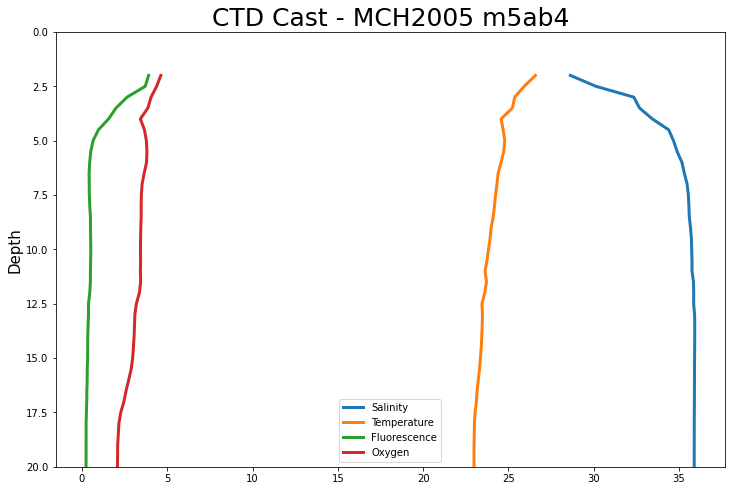

In [17]:
fig = plt.figure(figsize=(12,8))
plt.plot(data.Sal, data.Depth, color='C0', linewidth=3, label='Salinity')
plt.plot(data.Temp, data.Depth, color='C1', linewidth=3, label='Temperature')
plt.plot(data.FL, data.Depth, color='C2', linewidth=3, label='Fluorescence')
plt.plot(data.O2, data.Depth, color='C3', linewidth=3, label='Oxygen')

plt.ylim(20,0)
plt.legend()
plt.title('CTD Cast - MCH2005 m5ab4', size=25)
plt.ylabel('Depth', size=15)

In [20]:
import seaborn as sns

Text(0, 0.5, 'Depth')

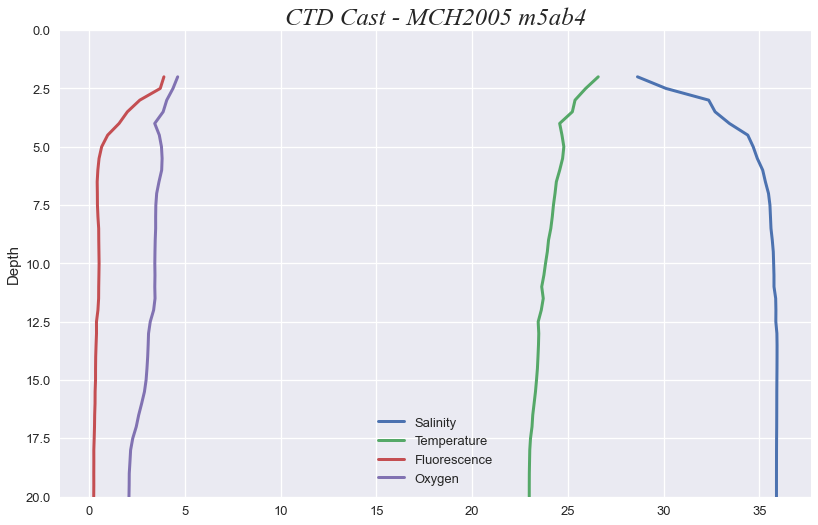

In [56]:
plt.style.use('seaborn-talk')
fig = plt.figure(figsize=(12,8))
plt.plot(data.Sal, data.Depth, linewidth=3, label='Salinity')
plt.plot(data.Temp, data.Depth, linewidth=3, label='Temperature')
plt.plot(data.FL, data.Depth, linewidth=3, label='Fluorescence')
plt.plot(data.O2, data.Depth, linewidth=3, label='Oxygen')

plt.ylim(20,0)
plt.legend()
plt.title('CTD Cast - MCH2005 m5ab4', size=25, name='Times New Roman', style='italic')
plt.ylabel('Depth', size=15)

In [21]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']